In [5]:
import sys
sys.path.append('/scr/ig_pipeline')

from b1k_pipeline.utils import ParallelZipFS, load_mesh

In [6]:
def process_mesh(fs, filename):
  m = load_mesh(fs, filename, force="mesh", skip_materials=True)
  return m.bounding_box.extents

In [8]:
from tqdm.notebook import tqdm

dimensions = {}
with ParallelZipFS("objects.zip") as fs:
  all_cmeshes = [x.path for x in fs.glob("objects/*/*/shape/collision/*.obj")]
  for filename in tqdm(all_cmeshes):
    dimensions[filename] = process_mesh(fs, filename)

  0%|          | 0/74185 [00:00<?, ?it/s]

In [11]:
# dimension ratio
dr = {k: v.max() / v.min() for k, v in dimensions.items()}
dr

/tmp/user/20505/ipykernel_108776/1550298309.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  dr = {k: v.max() / v.min() for k, v in dimensions.items()}


{'/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-18.obj': 6.114610812550401,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-14.obj': 9.110343564012707,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-29.obj': 1.7114254003675258,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-31.obj': 2.74438305251097,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-0.obj': 11.088252493280743,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-3.obj': 4.461280099282868,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-26.obj': 5.595337958397267,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-6.obj': 2.171365899826944,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-15.obj': 1.5506833791517165,
 '/objects/car_wheel/xeedbe/shape/collision/car_wheel-xeedbe-base_link-16.obj': 2.759610246779536,
 '/objects/

In [21]:
import numpy as np
bads = {k for k, v in dr.items() if v > 100}
print(len(bads))
bads

1676


{'/objects/walls/icyzno/shape/collision/walls-icyzno-base_link-0.obj',
 '/objects/ticket/ahknpi/shape/collision/ticket-ahknpi-base_link-0.obj',
 '/objects/walls/trarmn/shape/collision/walls-trarmn-base_link-0.obj',
 '/objects/window/ocpgvi/shape/collision/window-ocpgvi-glass_left-0.obj',
 '/objects/coffee_maker/pyttso/shape/collision/coffee_maker-pyttso-link_4-0.obj',
 '/objects/walls/ezpvbf/shape/collision/walls-ezpvbf-base_link-1.obj',
 '/objects/metal_bottom_cabinet/bbjuqu/shape/collision/metal_bottom_cabinet-bbjuqu-door-0.obj',
 '/objects/walls/nnxsjd/shape/collision/walls-nnxsjd-base_link-0.obj',
 '/objects/background/vtfqjb/shape/collision/background-vtfqjb-base_link-3.obj',
 '/objects/walls/vvfsdr/shape/collision/walls-vvfsdr-base_link-0.obj',
 '/objects/window/ijnwlp/shape/collision/window-ijnwlp-base_link-0.obj',
 '/objects/walls/abeith/shape/collision/walls-abeith-base_link-2.obj',
 '/objects/floors/ckbwre/shape/collision/floors-ckbwre-base_link-0.obj',
 '/objects/walls/hjkqr

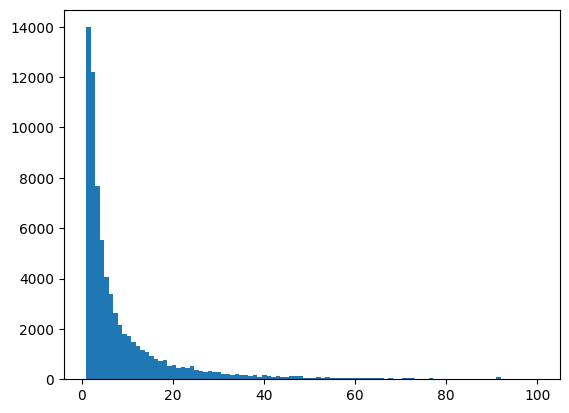

In [17]:
import matplotlib.pyplot as plt

plt.hist([v for v in dr.values() if v < 100], bins=100)
plt.show()